##Unsupervised Learning & Clustering Analysis- Biel Cantera Potente
- Marc Esteller Sánchez
- Clara Jiménez Seoane
- Martí Pastor Galtés
- Luke Harrison Perreault

## 1.

### 1.1. Open-Source Dataset: Smoker's Health Data

#### Description
Data filtered from a Hypertension Risk Dataset by Md Raihan Kahn. I was more interested in looking for health effects of smokers versus non-smokers here, but in the end I was the most surprised by the age groups of the heaviest smokers that were polled.

#### Features
- age: Represents the age of an individual (from 32 to 70).
- sex: Listed sex of person (male or female).
- current_smoker: Smoking status (yes or no).
- heart_rate: Heart rate of person (from 44 to 143).
- blood_pressure: Blood pressure readings.
- cigs_per_day: How many cigarettes per day (from 0 to 70).
- chol: Cholesterol of person (from 113 to 696).

#### Link
https://www.kaggle.com/datasets/jaceprater/smokers-health-data/data

#### Collaborator
Jace Prater (Owner)
Md Raihan Khan (Editor)


### 1.2. Appropriateness of the dataset
The dataset is appropriate. In first place, we can say that because there is a tabular structure because it is organized into rows and columns, where each row represents an individual sample or observation, and each column represents a specific feature or attribute of the data. In addition to this, we can easily handle missing values, filter rows, transform data types, and perform feature scaling or normalization.


### 1.3. Dataset Selection Justification
We selected this dataset for serveral reasons. In first place, because there isn't a target variable which is the best type of dataset for an unsupervised model. Furthermore, since some of our group members smoke we want to prove them how it can affect them.


### 1.4. Objectives
Our objectives in this project are to be able to create a great model where we can create groups and identify which characteristics usually relate with each other according to the information that we've got from the dataset.


### 1.5. Questions
1. How the quantity of cigarettes per day can affect the heart rate of someone?
2. How do the clusters differ in terms of cardiovascular risk factors?
3. Are there specific patterns or associations between smoking habits and other cardiovascular health indicators?
4. What are the latent features that best describe the variation in cardiovascular health metrics in the population?
5. Are there any latent profiles of individuals based on their cardiovascular health and lifestyle factors?

## 2. Load, clean and validate the dataset.

In [83]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
import os

from io import StringIO
from IPython.display import Image
import matplotlib as mpl
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import svm
from sklearn.datasets import make_moons
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, RandomForestRegressor
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
from sklearn.preprocessing import LabelEncoder
from sklearn import cluster
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN

%matplotlib inline
os.getcwd()

'/Users/bielcanterapotente/Desktop/Advanced data processing and Analysis '

### 2.1. Understand the dataset 

In [84]:
df = pd.read_csv("smoking_health_data_final.csv")
df

,age,sex,current_smoker,heart_rate,blood_pressure,cigs_per_day,chol
0,54,male,yes,95,110/72,NaN,219.0
1,45,male,yes,64,121/72,NaN,248.0
2,58,male,yes,81,127.5/76,NaN,235.0
3,42,male,yes,90,122.5/80,NaN,225.0
4,42,male,yes,62,119/80,NaN,226.0
...,...,...,...,...,...,...,...
3895,37,male,yes,88,122.5/82.5,60.0,254.0
3896,49,male,yes,70,123/75,60.0,213.0
3897,56,male,yes,70,125/79,60.0,246.0
3898,50,male,yes,85,134/95,60.0,340.0


In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             3900 non-null   int64  
 1   sex             3900 non-null   object 
 2   current_smoker  3900 non-null   object 
 3   heart_rate      3900 non-null   int64  
 4   blood_pressure  3900 non-null   object 
 5   cigs_per_day    3886 non-null   float64
 6   chol            3893 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 213.4+ KB


There are some nulls in 'cigs_per_day' and in 'chol' so we will look at them.

### 2.2. Number and names of attributes

In [86]:
df.columns

Index(['age', 'sex', 'current_smoker', 'heart_rate', 'blood_pressure',
       'cigs_per_day', 'chol'],
      dtype='object')

In [87]:
df.dtypes

age                 int64
sex                object
current_smoker     object
heart_rate          int64
blood_pressure     object
cigs_per_day      float64
chol              float64
dtype: object

In [88]:
df.shape

(3900, 7)

After taking a look at the dataset we can see that there are 3 variables that are objects, this could be a problem while doing our analyisis so we might need to create dummies for the variables sex and current smoker. Maybe we should do changes also on the variable blood_pressure but not using dummies.

### 2.3. Basic statistics

In [89]:
df.describe()

,age,heart_rate,cigs_per_day,chol
count,3900.000000,3900.000000,3886.000000,3893.000000
mean,49.537949,75.688974,9.168554,236.595941
std,8.559275,12.015376,12.037999,44.375365
min,32.000000,44.000000,0.000000,113.000000
25%,42.000000,68.000000,0.000000,206.000000
50%,49.000000,75.000000,0.000000,234.000000
75%,56.000000,82.000000,20.000000,263.000000
max,70.000000,143.000000,70.000000,696.000000


With this table we can get a general idea about the numerical variables that we have on our dataset. We can see that the mean of cigs_per_day is of 9 which could be considered as a high value but, taking a look at the max which is 70 maybe it isn't a high number and we might have the data very splitted.

In [90]:
result1 = df.groupby('sex').agg(
    total_count=('sex', 'count'),  # Here, 'count' is a function
  
)
result1.sort_values('sex')

,total_count
sex,
female,2081
male,1819


In [91]:
result2 = df.groupby('current_smoker').agg(
    total_count=('current_smoker', 'count'),  # Here, 'count' is a function
  
)
result2.sort_values('current_smoker')

,total_count
current_smoker,
no,1968
yes,1932


To also analyze the qualitative variabeles we splitted sex to see how many people of each gender there is and current_smoker to know how many are smoking. As we can see the dataset is quite equivalent in both variables. It's nearly 50-50 the observations of female and male and the current smokers and non-smokers.

### 2.4. Clean dataset

First, we are using df.info() to see in which variables we can find nulls.

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             3900 non-null   int64  
 1   sex             3900 non-null   object 
 2   current_smoker  3900 non-null   object 
 3   heart_rate      3900 non-null   int64  
 4   blood_pressure  3900 non-null   object 
 5   cigs_per_day    3886 non-null   float64
 6   chol            3893 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 213.4+ KB


As we can see we have nulls on the columns 'cigs_per_day' and 'chol', let's see the observations which have nulls.

In [93]:
null_cigs_rows = df[df['cigs_per_day'].isnull()]
null_cigs_rows

,age,sex,current_smoker,heart_rate,blood_pressure,cigs_per_day,chol
0,54,male,yes,95,110/72,NaN,219.0
1,45,male,yes,64,121/72,NaN,248.0
2,58,male,yes,81,127.5/76,NaN,235.0
3,42,male,yes,90,122.5/80,NaN,225.0
4,42,male,yes,62,119/80,NaN,226.0
5,57,male,yes,62,107.5/72.5,NaN,223.0
6,43,male,yes,75,109.5/69,NaN,222.0
7,42,male,yes,66,123/73,NaN,196.0
8,37,male,yes,65,123.5/77,NaN,188.0
9,49,male,yes,93,127.5/81.5,NaN,256.0


In [94]:
null_chol_rows = df[df['chol'].isnull()]
null_chol_rows

,age,sex,current_smoker,heart_rate,blood_pressure,cigs_per_day,chol
424,47,male,no,75,142/96,0.0,NaN
1013,65,male,no,65,152.5/97.5,0.0,NaN
1608,58,male,no,70,116.5/71,0.0,NaN
2104,45,male,yes,72,126/85,3.0,NaN
3175,51,male,yes,70,112.5/74,20.0,NaN
3613,50,male,yes,72,152.5/105,30.0,NaN
3705,43,male,yes,77,152/87,30.0,NaN


Now that we've seen that there isn't any anomaly on the nulls we can delete them.

In [95]:
df.dropna(subset=['cigs_per_day', 'chol'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3879 entries, 14 to 3899
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             3879 non-null   int64  
 1   sex             3879 non-null   object 
 2   current_smoker  3879 non-null   object 
 3   heart_rate      3879 non-null   int64  
 4   blood_pressure  3879 non-null   object 
 5   cigs_per_day    3879 non-null   float64
 6   chol            3879 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 242.4+ KB


Now we have our dataset clean.

## 3. Separate training and test datasets

### 3.1. Select and justify which percentage are going to represent training and test datasets separately.

We believe that the best choice is to split the dataset, which has 3879 entries, 80/20 for testing and training, respectively. By making this decision, a significant amount of the data (80%) will be used to train the model, enabling it to successfully identify patterns and relationships. We may argue that the model has a rich dataset to generalize from, with 3103 samples provided for training. This dataset may capture a variety of scenarios and variations contained in the data that can provide us with crucial information.


However, setting aside 20% of the data, or 776 samples, for testing guarantees a sizable enough sample size of unknown data to properly assess the model's performance. This division aids in evaluating the model's capacity to generalize to novel, previously unobserved cases, which is essential for ascertaining its efficacy and suitability for use in the real world.

Basically, this is what we think is the best way to separate training and test in our dataset given this project and the information we have.

### 3.2. Separate the complete dataset into training and tests groups.

In [96]:
df['dummies'] = 1

print(df)

      age     sex current_smoker  heart_rate blood_pressure  cigs_per_day  \
14     48    male             no          75         131/52           0.0   
15     58  female             no          75         126/52           0.0   
16     46  female             no          80         102/56           0.0   
17     45  female             no          75         106/58           0.0   
18     37  female             no          81         112/60           0.0   
...   ...     ...            ...         ...            ...           ...   
3895   37    male            yes          88     122.5/82.5          60.0   
3896   49    male            yes          70         123/75          60.0   
3897   56    male            yes          70         125/79          60.0   
3898   50    male            yes          85         134/95          60.0   
3899   40    male            yes          98         132/86          70.0   

       chol  dummies  
14    175.0        1  
15    240.0        1  
16    

In [97]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['dummies']) 
y = df['dummies']  

# dummies 
def create_dummies(df):
    df_encoded = df.copy()
    for column in df.columns:
        if df[column].dtype == 'object':
            le = LabelEncoder()
            df_encoded[column] = le.fit_transform(df[column])
            print(f"Column: {column}")
            for original, encoded in zip(df[column], df_encoded[column]):
                print(f"Original: {original} -> Encoded: {encoded}")
    return df_encoded

X = create_dummies(X)
X.head(5)
X = X.astype('float64')
X.sample(10)

Column: sex
Original: male -> Encoded: 1
Original: female -> Encoded: 0
Original: female -> Encoded: 0
Original: female -> Encoded: 0
Original: female -> Encoded: 0
Original: female -> Encoded: 0
Original: female -> Encoded: 0
Original: female -> Encoded: 0
Original: female -> Encoded: 0
Original: female -> Encoded: 0
Original: female -> Encoded: 0
Original: male -> Encoded: 1
Original: female -> Encoded: 0
Original: male -> Encoded: 1
Original: female -> Encoded: 0
Original: female -> Encoded: 0
Original: male -> Encoded: 1
Original: female -> Encoded: 0
Original: female -> Encoded: 0
Original: female -> Encoded: 0
Original: female -> Encoded: 0
Original: female -> Encoded: 0
Original: male -> Encoded: 1
Original: female -> Encoded: 0
Original: male -> Encoded: 1
Original: female -> Encoded: 0
Original: female -> Encoded: 0
Original: female -> Encoded: 0
Original: female -> Encoded: 0
Original: female -> Encoded: 0
Original: female -> Encoded: 0
Original: female -> Encoded: 0
Original

,age,sex,current_smoker,heart_rate,blood_pressure,cigs_per_day,chol
3241,56.0,1.0,1.0,90.0,1358.0,20.0,197.0
977,37.0,0.0,0.0,77.0,237.0,0.0,209.0
2704,36.0,1.0,1.0,100.0,51.0,15.0,300.0
3271,63.0,1.0,1.0,76.0,1919.0,20.0,213.0
1358,51.0,0.0,0.0,95.0,1441.0,0.0,261.0
3763,41.0,1.0,1.0,75.0,1251.0,40.0,260.0
946,61.0,0.0,0.0,68.0,2208.0,0.0,265.0
1501,35.0,0.0,0.0,92.0,626.0,0.0,175.0
1224,40.0,1.0,0.0,60.0,900.0,0.0,137.0
142,41.0,1.0,0.0,65.0,1007.0,0.0,173.0


In [98]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape, y_train.shape)
print("Test set shape:", X_test.shape, y_test.shape)

Training set shape: (3103, 7) (3103,)
Test set shape: (776, 7) (776,)


## 4. K-means method

### 4.1. What is Sum Squared Error (SSE)? Could you provide and explain the formula?

SSE tells us how close data points are to the centers of their clusters. Lower SSE means data points are closer to their cluster centers, making clusters more distinct. Clustering algorithms aim to minimize SSE to create tighter, more meaningful clusters.

The Sum of Squared Errors (SSE) is a way to measure how spread out the data points are within their clusters.

In simple terms, SSE helps us understand how well our clusters fit the data. Lower SSE means the clusters are tighter and more accurate. So, the goal of clustering algorithms like KMeans is to minimize SSE by finding the best positions for cluster centers.

For each cluster, we first examine them individually. Within every cluster, we consider each data point one by one. Then, we calculate the squared Euclidean distance between each data point x
x and its cluster's centroid. Think of Euclidean distance as the straight-line distance between two points. This helps us gauge how far each data point is from its cluster's center. Squaring this distance ensures it's positive and highlights bigger differences. Next, we sum up all these squared distances within each cluster, providing a measure of how spread out the data points are within it. Finally, we sum up these sums across all clusters to derive the total SSE, indicating the overall spread or "error" of our clustering solution.

### 4.2. Obtain k value.

#### 4.2.1. How are we getting k value (graphically, calculating)? Why?

We are getting the k value graphically by looking at the elbow graph (explanation below), and by finding the highest silhouette score which formula is based on calculating the silhouette scores for each k (shown below).

#### 4.2.2. Represent the elbow graph. Which K value is selected?

In [100]:
dictionary = {'Key': "Value"}

for k in range(1,10):
  dictionary = {k : cluster.KMeans(n_clusters=k, max_iter=100).fit(X_train).inertia_}
  print(dictionary)

/Users/bielcanterapotente/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/bielcanterapotente/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/bielcanterapotente/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


{1: 1207249252.849502}
{2: 334928651.02279234}
{3: 155606237.5704761}


/Users/bielcanterapotente/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/bielcanterapotente/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


{4: 89893348.07614209}
{5: 59599007.54142511}


/Users/bielcanterapotente/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/bielcanterapotente/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


{6: 44245755.10137682}
{7: 33863747.726077296}


/Users/bielcanterapotente/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


{8: 27955648.861061864}


/Users/bielcanterapotente/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


{9: 23111705.67859938}


Based on the elbow graph and calculating the silhouette scores we have chosen k = 3. It doesn't have the highest silhouette score but the representation of the clusters is better in our opinion.
Also, using a dictionary, we could see how the amount of errors doesn't decrease significantly enough from using k = 3 to k = 4.
However, we want to double check by training the KMeans model, computing the silhouette score, and visualizing the clusters 2, 3 and 5.

/Users/bielcanterapotente/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/bielcanterapotente/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/bielcanterapotente/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/bielcanterapotente/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarni

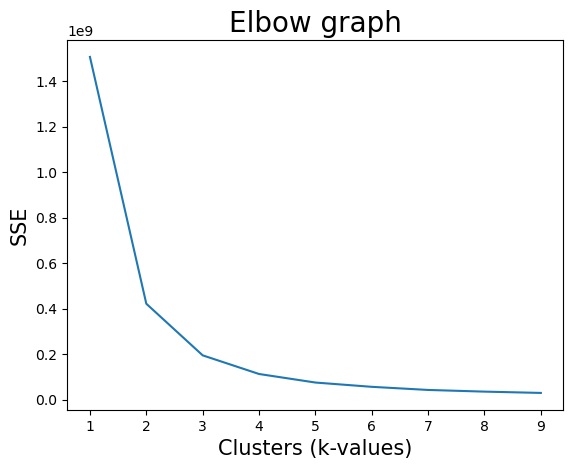

{1: 1506379261.3591137, 2: 421422192.03437066, 3: 194490458.2852949, 4: 112543889.97024377, 5: 74935143.26216938, 6: 56118784.185773715, 7: 42380238.75819531, 8: 35013148.71241695, 9: 29307053.53476469}


In [101]:
sse = { k : cluster.KMeans(n_clusters=k, max_iter=100).fit(X).inertia_ for k in range(1,10)}
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.title('Elbow graph', fontsize=20)
plt.xlabel('Clusters (k-values)', fontsize=15)
plt.ylabel('SSE', fontsize=15)
plt.show()

print (sse)

In [102]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np

# Define range of k values to evaluate
k_values = range(2, 11)

# Calculate silhouette scores for each k
silhouette_scores = []
for k in k_values:
    kmeans = KMeans(n_clusters=k)
    cluster_labels = kmeans.fit_predict(X_train)
    silhouette_avg = silhouette_score(X_train, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Find the optimal k value with the highest silhouette score
optimal_k = k_values[np.argmax(silhouette_scores)]
print("Optimal k value:", optimal_k)

/Users/bielcanterapotente/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/bielcanterapotente/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/bielcanterapotente/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/bielcanterapotente/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarni

Optimal k value: 2


## training the KMeans model, computing the silhouette score, and visualizing the clusters 

### K value of 2

In [103]:
# this is not including the PCA which we include blow for graphical representation
kmeans = cluster.KMeans(n_clusters=2, n_init=10, max_iter=65).fit(X_train)

# Predict cluster labels for test data
labels = kmeans.predict(X_test)

# Add cluster labels to the test data
X_test_with_labels = pd.DataFrame(X_test, columns=['age', 'sex' ,'current_smoker', 'heart_rate', 'blood_pressure', 'cigs_per_day', 'chol'])
X_test_with_labels['cluster'] = labels
silhouette_avg = silhouette_score(X_test, labels)

print("Silhouette Score:", silhouette_avg)

# Calculate means/count for each feature within each cluster
cluster_stats = X_test_with_labels.groupby('cluster').agg(['mean', 'count'])

# Display the cluster statistics
print(cluster_stats)

Silhouette Score: 0.5880685852723403
               age             sex       current_smoker       heart_rate  \
              mean count      mean count           mean count       mean   
cluster                                                                    
0        52.583082   331  0.432024   331       0.392749   331  77.676737   
1        47.795506   445  0.487640   445       0.519101   445  73.680899   

              blood_pressure       cigs_per_day              chol        
        count           mean count         mean count        mean count  
cluster                                                                  
0         331    1650.009063   331     7.567976   331  246.712991   331  
1         445     591.723596   445     9.548315   445  230.501124   445  


below is graphical representation of our clusters.

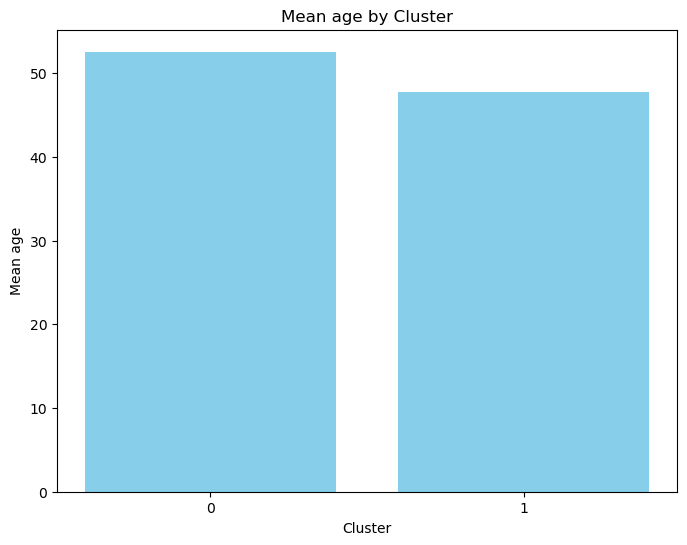

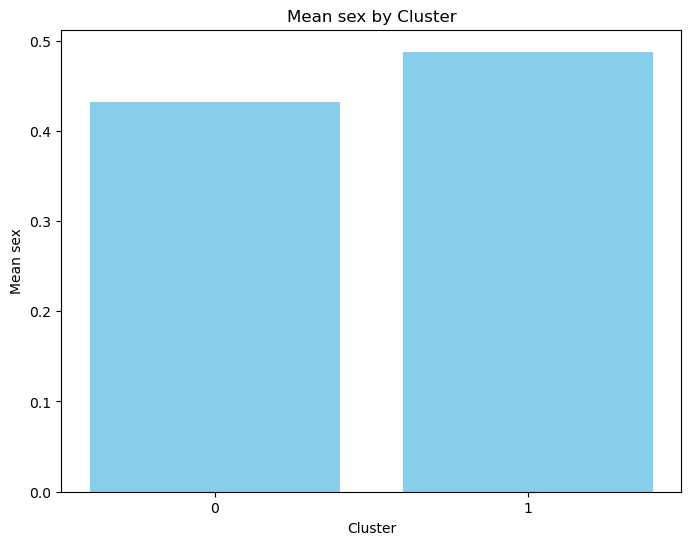

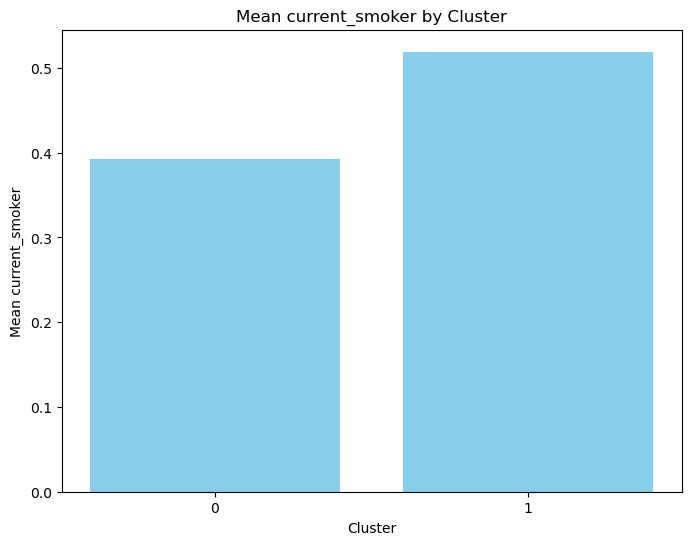

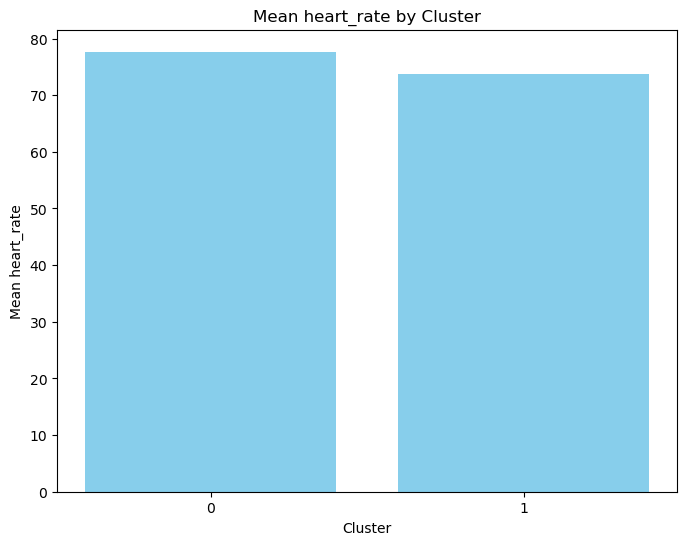

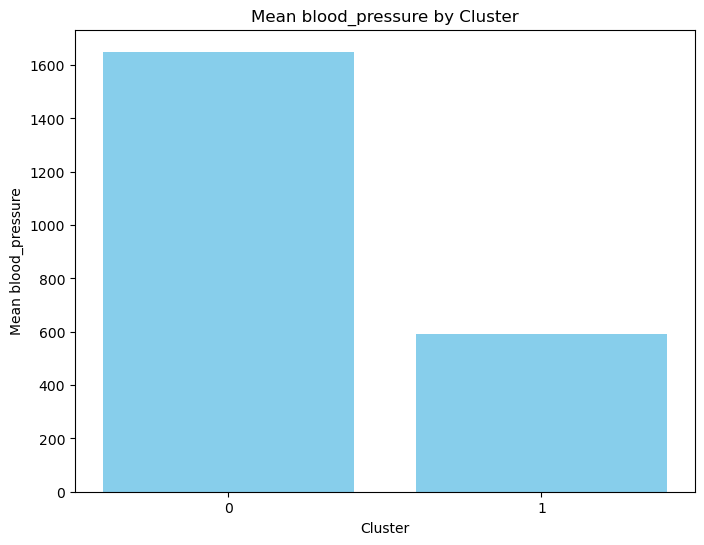

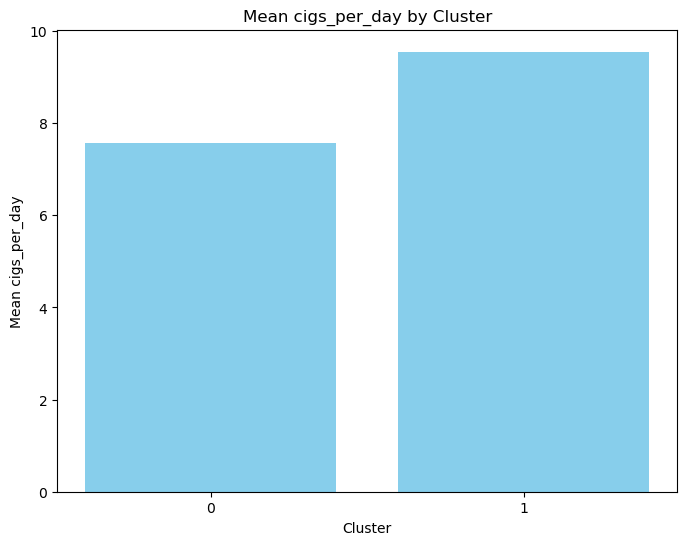

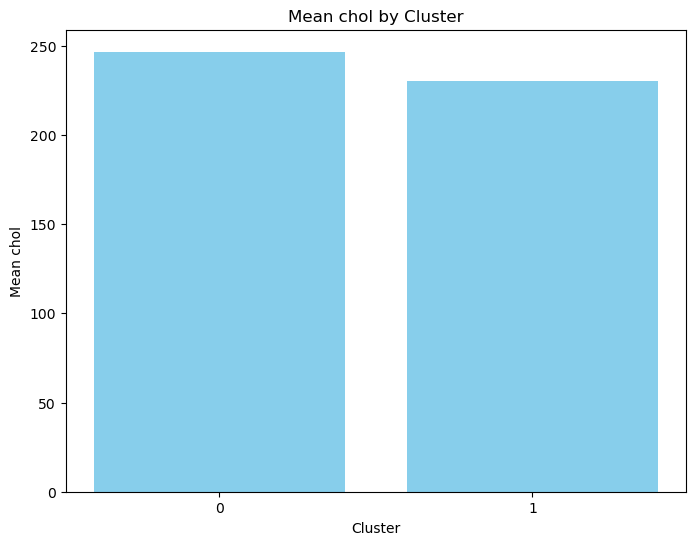

In [104]:
means_by_cluster = X_test_with_labels.groupby('cluster').mean()

# Plot bar charts for each variable
for column in means_by_cluster.columns:
    plt.figure(figsize=(8, 6))
    plt.bar(means_by_cluster.index, means_by_cluster[column], color='skyblue')
    plt.xlabel('Cluster')
    plt.ylabel(f'Mean {column}')
    plt.title(f'Mean {column} by Cluster')
    plt.xticks(means_by_cluster.index)
    plt.show()

We have a decent silhouette score here of 58. and we can see what is in each cluster.

A higher silhouette score indicates that the object is well-matched to its own cluster and poorly matched to neighboring clusters, suggesting a good clustering solution.

/Users/bielcanterapotente/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/bielcanterapotente/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


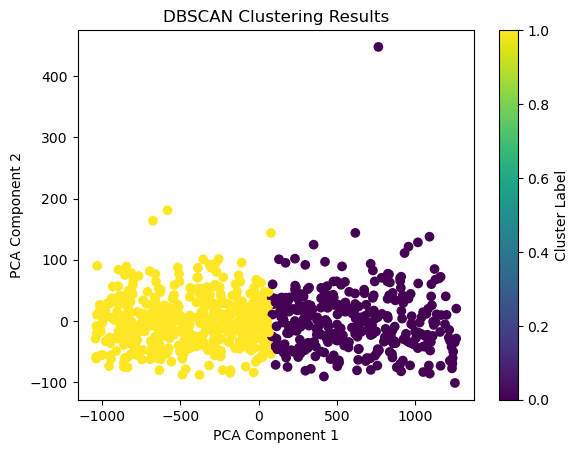

In [105]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_test)

# Step 2: Apply KMEANS clustering to the transformed data
kmeans = cluster.KMeans(n_clusters=2, init='k-means++', random_state=42).fit(X_train)
labels = kmeans.fit_predict(X_pca)

# Step 2: Apply DBSCAN clustering to the transformed data
#kmeans = cluster.KMeans(n_clusters=2,n_init = 10, max_iter = 65).fit(X_train)



# Step 3: Plot the clustering results on a 2D graph
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('DBSCAN Clustering Results')
plt.colorbar(label='Cluster Label')
plt.show()

In [106]:
# to see just accuracy when using the PCA which is totally necessary but its interesting to compare to the kmeans without PCA.
# Step 1: Apply PCA to reduce dimensionality of the test data
X_test_pca = pca.transform(X_test)

# Step 2: Apply KMEANS MOdel to the transformed test data
test_labels = kmeans.fit_predict(X_test_pca)

# Step 3: Calculate the silhouette score
silhouette_avg = silhouette_score(X_test_pca, test_labels)

# Print the silhouette score
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.5899101220282328


/Users/bielcanterapotente/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


This is also 58 which is interesting bc the PCA model reduces the variables into 1 so we can graph it.

### K value of 3

In [107]:
# this is not including the PCA which we include blow for graphical representation
kmeans = cluster.KMeans(n_clusters=3, n_init=10, max_iter=65).fit(X_train)

# Predict cluster labels for test data
labels = kmeans.predict(X_test)

# Add cluster labels to the test data
X_test_with_labels = pd.DataFrame(X_test, columns=['age', 'sex' , 'current_smoker', 'heart_rate', 'blood_pressure', 'cigs_per_day', 'chol'])
X_test_with_labels['cluster'] = labels
silhouette_avg = silhouette_score(X_test, labels)

print("Silhouette Score:", silhouette_avg)

# Calculate means/count for each feature within each cluster
cluster_stats = X_test_with_labels.groupby('cluster').agg(['mean', 'count'])

# Display the cluster statistics
print(cluster_stats)

Silhouette Score: 0.5553609946755063
               age             sex       current_smoker       heart_rate  \
              mean count      mean count           mean count       mean   
cluster                                                                    
0        49.208191   293  0.508532   293       0.440273   293  76.187713   
1        47.003690   271  0.468635   271       0.542435   271  72.682657   
2        54.330189   212  0.396226   212       0.400943   212  77.731132   

              blood_pressure       cigs_per_day              chol        
        count           mean count         mean count        mean count  
cluster                                                                  
0         293    1070.440273   293     9.133106   293  238.976109   293  
1         271     377.988930   271     9.383764   271  227.129151   271  
2         212    1855.641509   212     7.240566   212  248.410377   212  


slightly less score here. below is the graph to see what makes the clusters different.

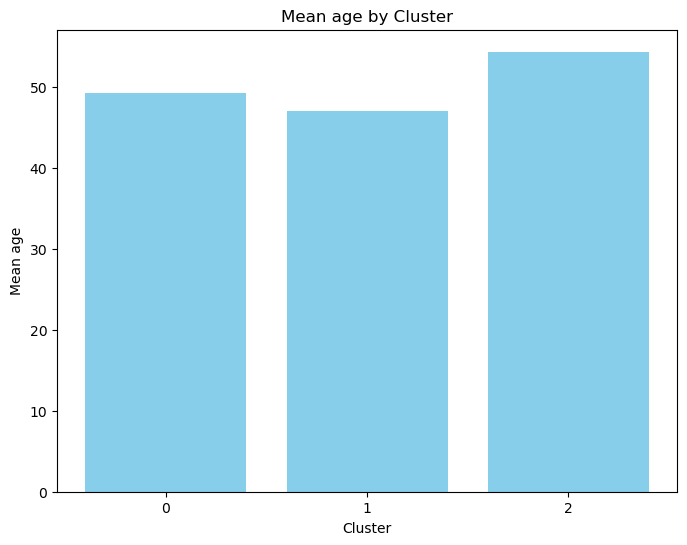

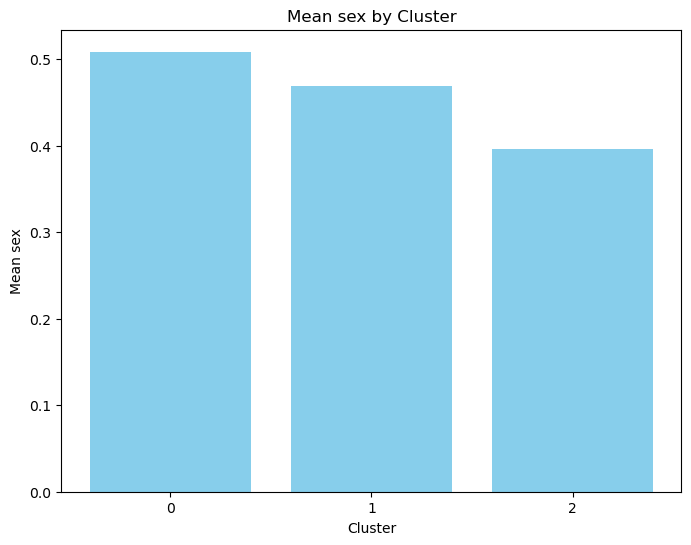

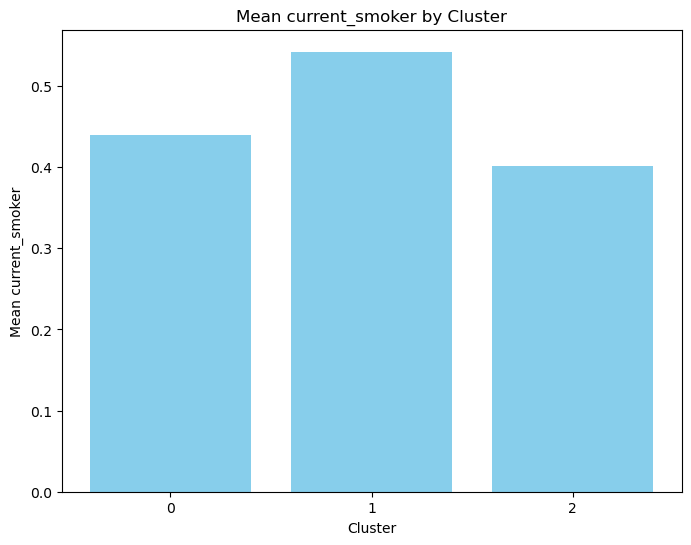

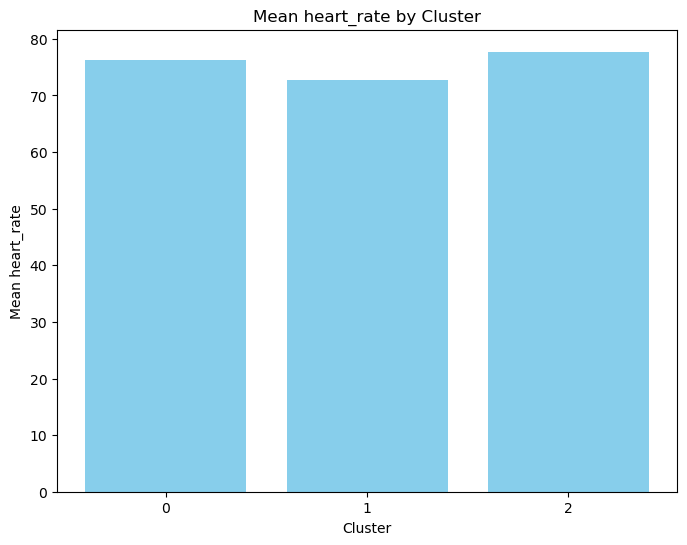

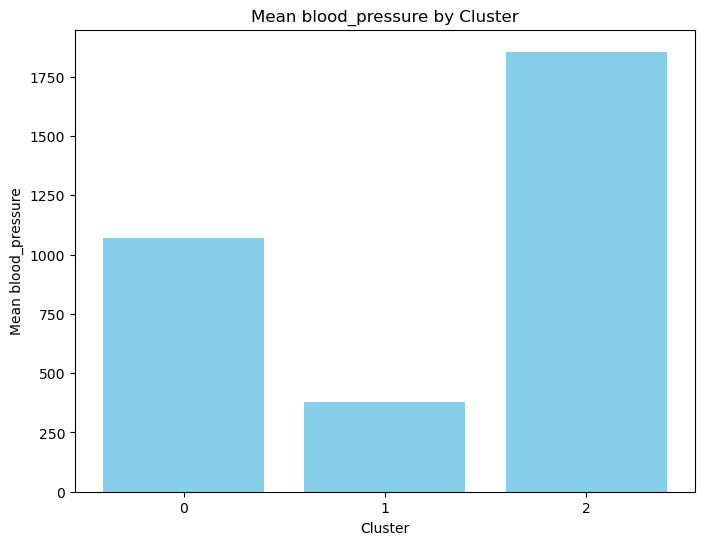

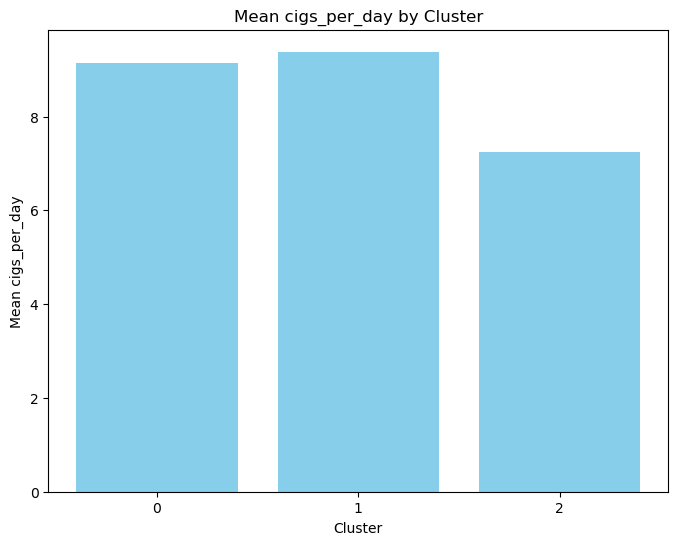

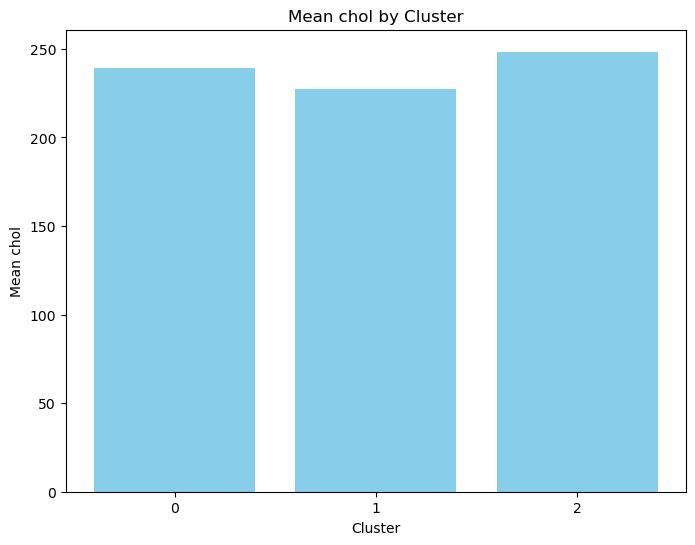

In [108]:
means_by_cluster = X_test_with_labels.groupby('cluster').mean()

# Plot bar charts for each variable
for column in means_by_cluster.columns:
    plt.figure(figsize=(8, 6))
    plt.bar(means_by_cluster.index, means_by_cluster[column], color='skyblue')
    plt.xlabel('Cluster')
    plt.ylabel(f'Mean {column}')
    plt.title(f'Mean {column} by Cluster')
    plt.xticks(means_by_cluster.index)
    plt.show()

/Users/bielcanterapotente/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/bielcanterapotente/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


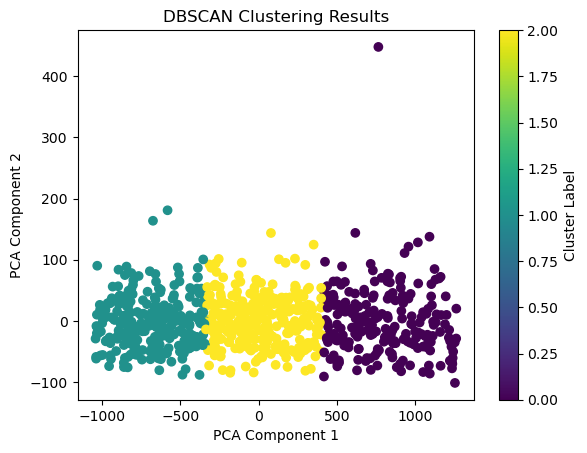

In [109]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_test)

# Step 2: Apply KMEANS clustering to the transformed data
kmeans = cluster.KMeans(n_clusters=3, init='k-means++', random_state=42).fit(X_train)
labels = kmeans.fit_predict(X_pca)

# Step 3: Plot the clustering results on a 2D graph
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('DBSCAN Clustering Results')
plt.colorbar(label='Cluster Label')
plt.show()

In [110]:
# Step 1: Apply PCA to reduce dimensionality of the test data
X_test_pca = pca.transform(X_test)

# Step 2: Apply KMEANS MOdel to the transformed test data
test_labels = kmeans.fit_predict(X_test_pca)

# Step 3: Calculate the silhouette score
silhouette_avg = silhouette_score(X_test_pca, test_labels)

# Print the silhouette score
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.5626218589220428


/Users/bielcanterapotente/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


### K value of 5

In [111]:
# this is not including the PCA which we include blow for graphical representation
kmeans = cluster.KMeans(n_clusters=5, n_init=10, max_iter=65).fit(X_train)

# Predict cluster labels for test data
labels = kmeans.predict(X_test)

# Add cluster labels to the test data
X_test_with_labels = pd.DataFrame(X_test, columns=['age','sex' , 'current_smoker', 'heart_rate', 'blood_pressure', 'cigs_per_day', 'chol'])
X_test_with_labels['cluster'] = labels
silhouette_avg = silhouette_score(X_test, labels)

print("Silhouette Score:", silhouette_avg)

# Calculate means/count for each feature within each cluster
cluster_stats = X_test_with_labels.groupby('cluster').agg(['mean', 'count'])

# Display the cluster statistics
print(cluster_stats)

Silhouette Score: 0.516222669001635
               age             sex       current_smoker       heart_rate  \
              mean count      mean count           mean count       mean   
cluster                                                                    
0        47.011696   171  0.450292   171       0.526316   171  72.654971   
1        49.387283   173  0.497110   173       0.450867   173  76.560694   
2        55.400000   120  0.308333   120       0.333333   120  77.691667   
3        51.727273   143  0.510490   143       0.419580   143  78.006993   
4        47.609467   169  0.514793   169       0.550296   169  73.088757   

              blood_pressure       cigs_per_day              chol        
        count           mean count         mean count        mean count  
cluster                                                                  
0         171     244.836257   171     9.286550   171  223.502924   171  
1         173    1088.572254   173     9.595376   173  239.

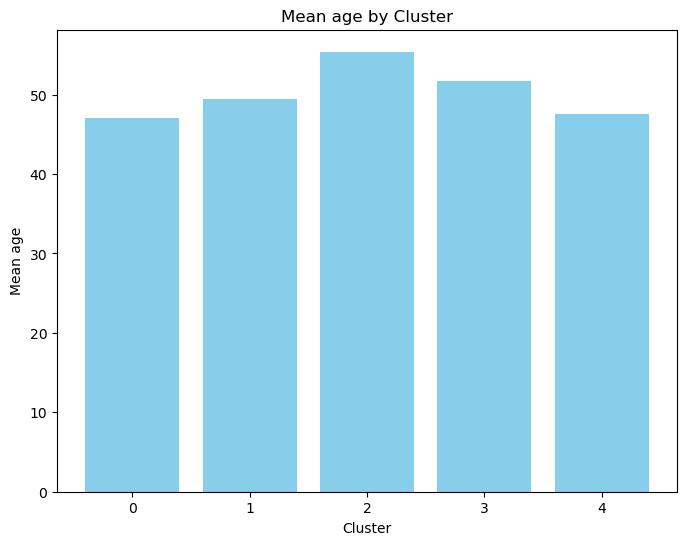

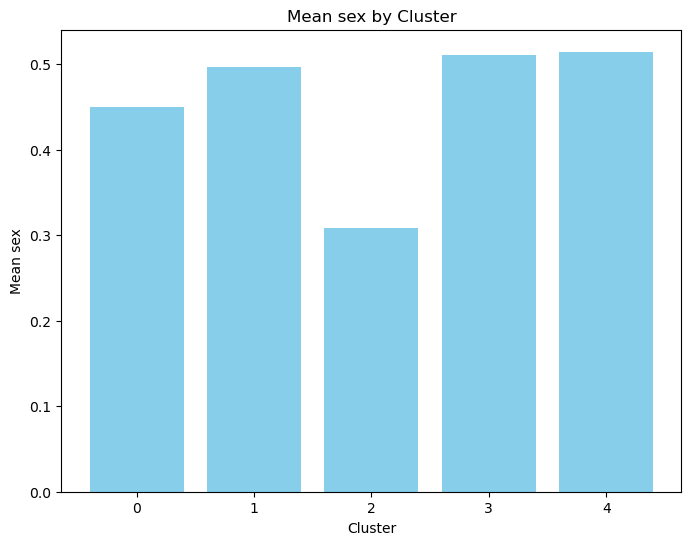

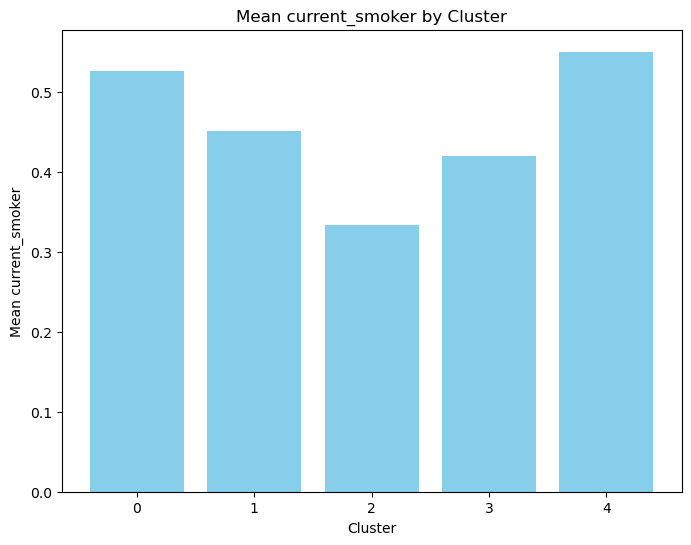

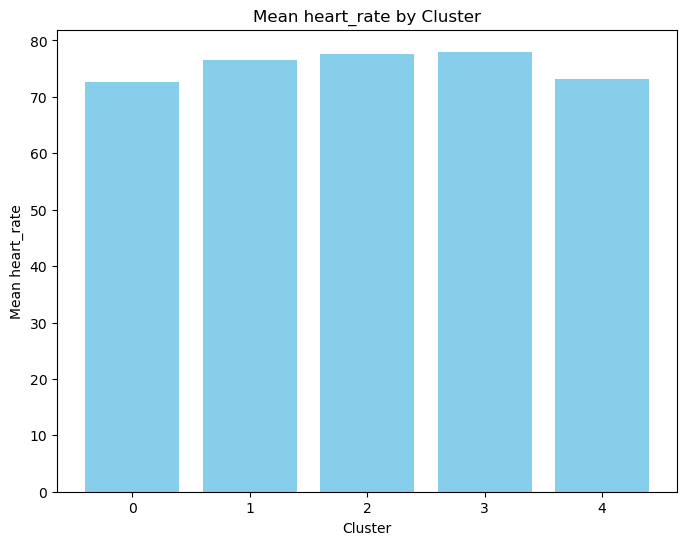

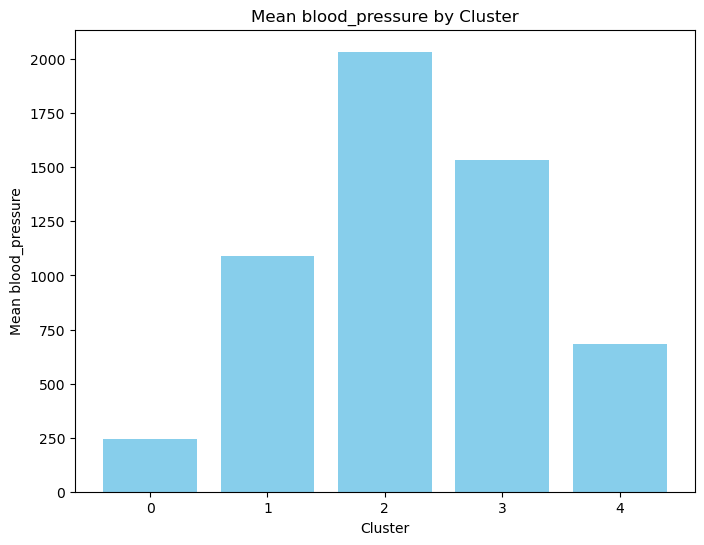

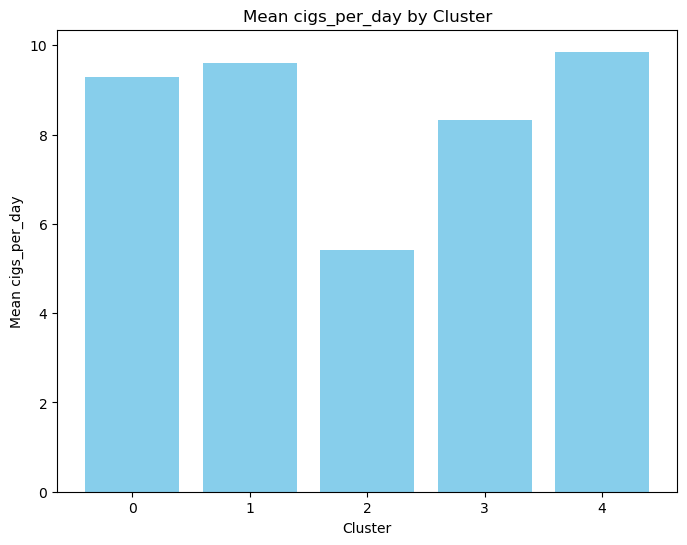

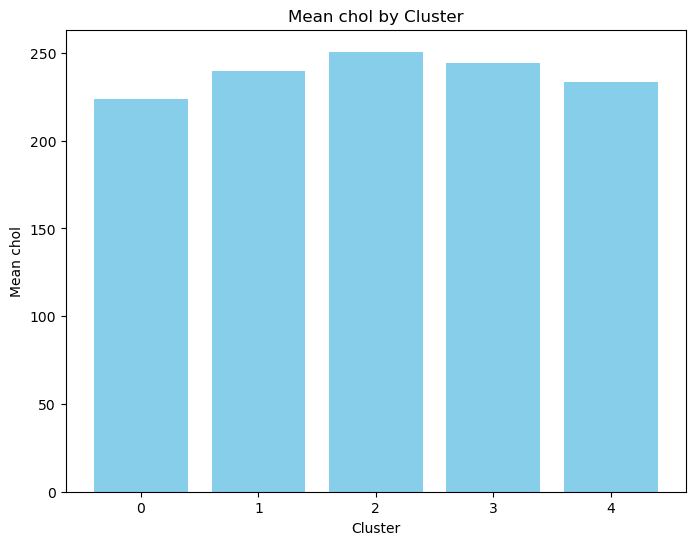

In [112]:
means_by_cluster = X_test_with_labels.groupby('cluster').mean()

# Plot bar charts for each variable
for column in means_by_cluster.columns:
    plt.figure(figsize=(8, 6))
    plt.bar(means_by_cluster.index, means_by_cluster[column], color='skyblue')
    plt.xlabel('Cluster')
    plt.ylabel(f'Mean {column}')
    plt.title(f'Mean {column} by Cluster')
    plt.xticks(means_by_cluster.index)
    plt.show()

/Users/bielcanterapotente/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/bielcanterapotente/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


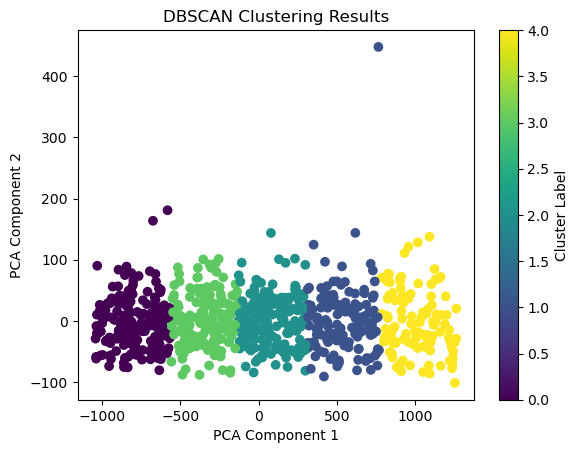

In [113]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_test)

# Step 2: Apply KMEANS clustering to the transformed data
kmeans = cluster.KMeans(n_clusters=5, init='k-means++', random_state=42).fit(X_train)
labels = kmeans.fit_predict(X_pca)

# Step 3: Plot the clustering results on a 2D graph
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('DBSCAN Clustering Results')
plt.colorbar(label='Cluster Label')
plt.show()

In [114]:
# Step 1: Apply PCA to reduce dimensionality of the test data
X_test_pca = pca.transform(X_test)

# Step 2: Apply KMEANS MOdel to the transformed test data
test_labels = kmeans.fit_predict(X_test_pca)

# Step 3: Calculate the silhouette score
silhouette_avg = silhouette_score(X_test_pca, test_labels)

# Print the silhouette score
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.5298221236762256


/Users/bielcanterapotente/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


PCA is used to reduce the dimensionality of the data from its original space to a 2-dimensional space, which can be easily visualized in a scatter plot.

#### 4.2.3. How could be improve the k value election, if we are using graphical technique to decide it?

/Users/bielcanterapotente/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/bielcanterapotente/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/bielcanterapotente/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/bielcanterapotente/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarni

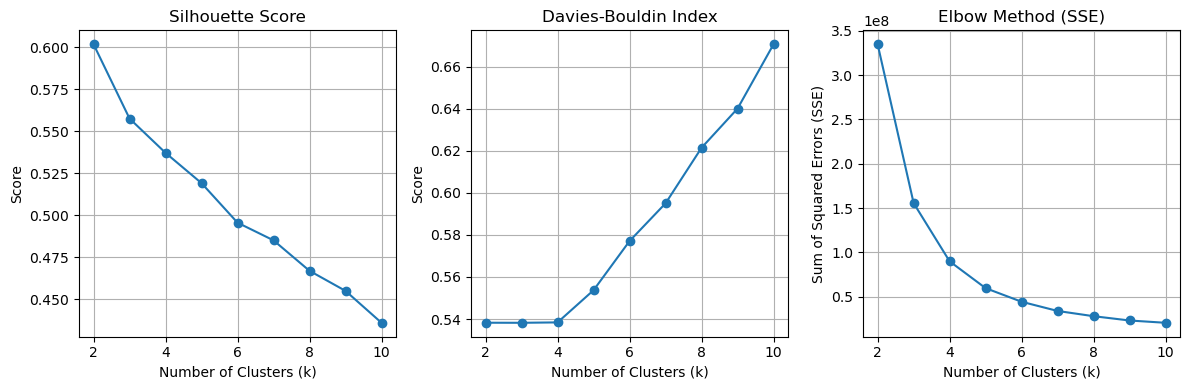

In [115]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
import numpy as np
import matplotlib.pyplot as plt

Xs = X_train

k_values = range(2, 11)


silhouette_scores = []
db_scores = []
sse_values = []

# Evaluate multiple metrics for each k value
for k in k_values:
    # Fit KMeans model
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(Xs)
    
    # Calculate silhouette score
    silhouette_avg = silhouette_score(Xs, kmeans.labels_)
    silhouette_scores.append(silhouette_avg)
    
    # Calculate Davies-Bouldin index
    db_index = davies_bouldin_score(Xs, kmeans.labels_)
    db_scores.append(db_index)
    
    # Calculate Sum of Squared Errors (SSE)
    sse_values.append(kmeans.inertia_)
    
# Plot metrics
plt.figure(figsize=(12, 4))

# Silhouette score plot
plt.subplot(1, 3, 1)
plt.plot(k_values, silhouette_scores, marker='o')
plt.title('Silhouette Score')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Score')
plt.grid(True)

# Davies-Bouldin index plot
plt.subplot(1, 3, 2)
plt.plot(k_values, db_scores, marker='o')
plt.title('Davies-Bouldin Index')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Score')
plt.grid(True)

# Elbow plot (SSE)
plt.subplot(1, 3, 3)
plt.plot(k_values, sse_values, marker='o')
plt.title('Elbow Method (SSE)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.grid(True)

plt.tight_layout()
plt.show()


After visualizing the graphs, we see that Davies-Bouldin Index recommends a k value of 4. However, the other ones recommend k = 3.

#### 4.3 Train the model and apply new values for a prediction. Comment the results.

Since my data our already trained, we're going to visualize some new tests.

/Users/bielcanterapotente/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/bielcanterapotente/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


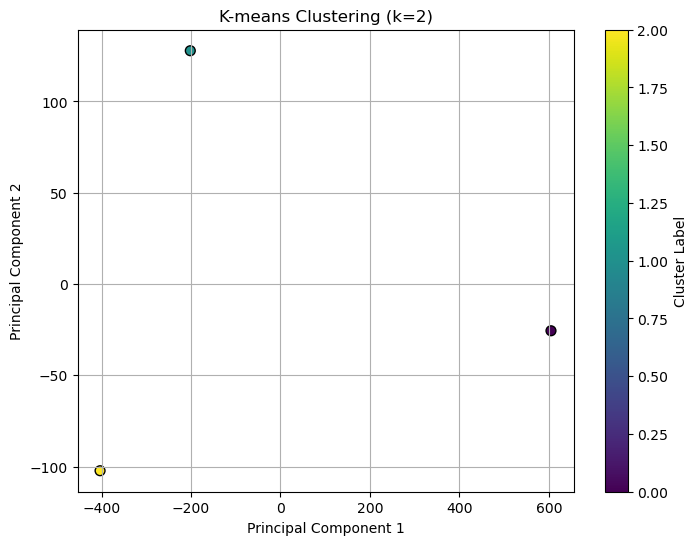

Silhouette Score: 0.4415643379354923
          age        sex       current_smoker       heart_rate        \
         mean count mean count           mean count       mean count   
cluster                                                                
0        35.5     2  0.0     2            0.5     2       83.5     2   
1        52.0     1  1.0     1            1.0     1       77.0     1   

        blood_pressure       cigs_per_day         chol        
                  mean count         mean count   mean count  
cluster                                                       
0                695.0     2         10.0     2  340.0     2  
1               1600.0     1          7.0     1  270.0     1  


/Users/bielcanterapotente/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


In [119]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

#age 
#sex
#current_smoker 
#heart_ratee
#blood_pressur
#cigs_per_day
#chol 

test_rows = [
    [47, 0, 0, 72, 590, 10, 230],  # Test row 1
    [52, 1, 1, 77, 1600, 7, 270],    # Test row 2
    [24, 0, 1, 95, 800, 10, 450]    # Test row 3
]

# Convert the test rows to a NumPy array
new_data = np.array(test_rows)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(new_data)

# Step 2: Apply KMEANS clustering to the transformed data
kmeans = cluster.KMeans(n_clusters=3,  init='k-means++', random_state=42).fit(X_train)

labels = kmeans.fit_predict(X_pca)


# Plot the results
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', marker='o', edgecolor='k', s=50)
plt.title('K-means Clustering (k=2)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster Label')
plt.grid(True)
plt.show()

# this is not including the PCA which we include blow for graphical representation
kmeans = cluster.KMeans(n_clusters=2, n_init=10, max_iter=65).fit(X_train)

# Predict cluster labels for test data
labels = kmeans.predict(new_data)

# Add cluster labels to the test data
X_test_with_labels = pd.DataFrame(new_data, columns=['age', 'sex' ,'current_smoker', 'heart_rate', 'blood_pressure', 'cigs_per_day', 'chol'])
X_test_with_labels['cluster'] = labels
silhouette_avg = silhouette_score(new_data, labels)

print("Silhouette Score:", silhouette_avg)

# Calculate means/count for each feature within each cluster
cluster_stats = X_test_with_labels.groupby('cluster').agg(['mean', 'count'])

# Display the cluster statistics
print(cluster_stats)

The score here is 44 which is okay because the last data point is very strange. The first two i put were more according to the cluster parameters that i knew would put a value in that particular cluster. 
You can put any vlaue in and get the score and see the differences. but the thing is for silhoette score to work you need to have your test data split into atleast two clusters. If not you will get an error.

### 4.4. Validate the accuracy of the model.

Since we're working with unsupervised learning and don't have ground truth labels, calculating accuracy as a performance metric isn't applicable. Therefore, for an unsupervised techinque we're using the Silhouette score. So our score of 0.44 suggests that the clusters are reasonably well-separated and that the clustering algorithm has performed fairly well in distinguishing between different clusters

## 5. Unsupervised model 

### 5.1. Why do you choose this method? Which is the main different with k-means?

In contrast to the k-means model which relies on distance measures and more geared for numerical variables, we will try the Density Clustering with the DBSCAN model. This model we saw in class as well which is another reason we choose it. The main difference is the fact that the algorythm relies on similarity or disimilarity as its deciding factor while the k-means relies on distance measures. 

### 5.2. Get k-value and train the model. Which error measure are you selecting? Why?

In [120]:
# Density Clustering
# I TOOK the "fit" out bc it is not necessary. eps is the mx distance between two samples for them to be considered a neighborhood. 
# min_samples
# Aplicar clustering por density.
dbscan = DBSCAN(eps=55, min_samples=25).fit(X_train)
labels = dbscan.fit_predict(X_test)

silhouette_avg = silhouette_score(X_test, labels)

# Print the silhouette score
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.01664916634725347


In [121]:
# Step 1: Apply PCA to reduce dimensionality to two dimensions
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_test)

# Step 2: Apply DBSCAN clustering to the transformed data
dbscan = DBSCAN(eps=55, min_samples=25).fit(X_train)
labels = dbscan.fit_predict(X_pca)
# we choose the min smaples of 25 because we want atleast a decent amount of smaples in each cluster and is close to 30 which is the number used in statistics to know if a sample can be called significant enough for measuring.
# The reason why I didnt use 30 though was because the clusters in the graph were separated oddly. 
# The EPS was more chosen to see what would get a good looking graph. 

### 5.3. Validate the accuracy of the model.

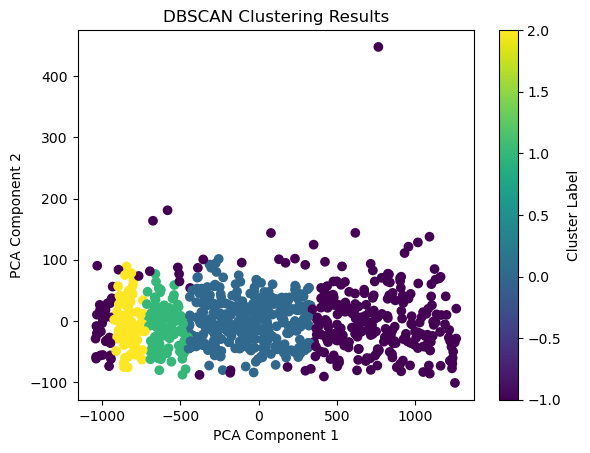

In [122]:
# Step 3: Plot the clustering results on a 2D graph
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('DBSCAN Clustering Results')
plt.colorbar(label='Cluster Label')
plt.show()

Again, I think this clustering is interesting and was one of the best ones that the parameters gave me. I wish the purple on the left was just all yellow but its okay.

lets see the results now

In [123]:
from sklearn.metrics import silhouette_score

# Step 1: Apply PCA to reduce dimensionality of the test data
X_test_pca = pca.transform(X_test)

# Step 2: Apply DBSCAN clustering to the transformed test data
test_labels = dbscan.fit_predict(X_test_pca)

# Step 3: Calculate the silhouette score
silhouette_avg = silhouette_score(X_test_pca, test_labels)

# Print the silhouette score
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.31456960212758367


In the end choose the paramters we did becuase by going off the graph the clusters are split best into a few clusters. 
our results for the silhoette score is prretty good. It means that the clusters fit well to our data or vice versa. I feel it could be better and below is why...
Maybe we shouldve chose different parameters bc we chose our parameters based off practicality of the graph and not the silhoette score because when we tested with high parameters and got one cluster then the silhoette score was 100%. So we kinda played with the parameters.
Finally an issue with this model is the insufficient separation between clusters. This probably could be the reason it didnt do better bc there isnt major seperation between clusters.

### 5.4. Is it better than k-means?

No, the density model did worse than the Kmeans by terms of accuracy but only slightly. They split the data in different ways using different parameters. Our dataset is more geared for using averages for clustering rather than whats density i guess. but not by much.

## 6. Dimensionality reduction - PCA

### 6.1. What is PCA?

Instead of using means to define clusters it relies on mediods which are actual data points and focus on datas similarities and differences by partioning data points to the nearest mediod center.
By using this method of clustering we hopefully aim to get more interpretable results.

### 6.2. Could it be classified as a supervised technique? Why?

I don't think it is supervised other than the fact it takes the existing data points and clusters by already existing trends which is the argument for if its supervised or not. But there is no target variable we are working with and we aren't training 

### 6.3. Upload “Breast Cancer” dataset from sklearn and apply any modification required to be used.

In [124]:
from sklearn.datasets import load_breast_cancer
import pandas as pd

data = load_breast_cancer()

df1 = pd.DataFrame(data.data, columns=data.feature_names)

print(df1.head())

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst radius  worst texture  worst perimeter  \
0           

### 6.4. What us the normalization process? Normalize the features from the dataset.

Normalization process is based on scaling numerical data to a standard range. It is a pretty common preprocessing step in machine learning that ensure that features are on a similar scale, meaning that it can prevent some features from dominating others in the learning process.

In [125]:
from sklearn.preprocessing import StandardScaler
data = load_breast_cancer()

df1 = pd.DataFrame(data.data, columns=data.feature_names)

scaler = StandardScaler()

normalized_data = scaler.fit_transform(df1)

normalized_df = pd.DataFrame(normalized_data, columns=df1.columns)

print(normalized_df.head())

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0     1.097064     -2.073335        1.269934   0.984375         1.568466   
1     1.829821     -0.353632        1.685955   1.908708        -0.826962   
2     1.579888      0.456187        1.566503   1.558884         0.942210   
3    -0.768909      0.253732       -0.592687  -0.764464         3.283553   
4     1.750297     -1.151816        1.776573   1.826229         0.280372   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0          3.283515        2.652874             2.532475       2.217515   
1         -0.487072       -0.023846             0.548144       0.001392   
2          1.052926        1.363478             2.037231       0.939685   
3          3.402909        1.915897             1.451707       2.867383   
4          0.539340        1.371011             1.428493      -0.009560   

   mean fractal dimension  ...  worst radius  worst texture  worst perimeter  \
0           

### 6.5. Apply PCA technique (n_components =2) and train it.

In [126]:
normalized_df['dummies'] = 1
# we need the training and test sets right?
X1 = normalized_df.drop(columns=['dummies']) 
y1 = normalized_df['dummies']  

# dummies 
X1 = pd.get_dummies(X1)

X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

In [127]:
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN

# Step 1: Apply PCA to reduce dimensionality to two dimensions
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_test)

# Step 2: Apply DBSCAN clustering to the transformed data
dbscan = DBSCAN(eps=2, min_samples=10).fit(X_train)
labels = dbscan.fit_predict(X_pca)

# Calculate silhouette score using testing data and cluster labels
silhouette_avg = silhouette_score(X_pca, labels)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.5455743974357188


### 6.6. Plot the visualization of the 2 components with the legend.

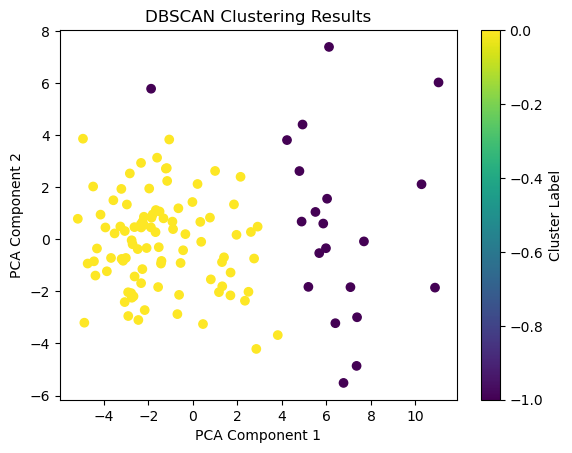

In [128]:
# Step 1: Apply PCA to reduce dimensionality to two dimensions
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_test)

# Step 2: Apply DBSCAN clustering to the transformed data
dbscan = DBSCAN(eps=2, min_samples=10).fit(X_train)
labels = dbscan.fit_predict(X_pca)

# Step 3: Plot the clustering results on a 2D graph
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('DBSCAN Clustering Results')
plt.colorbar(label='Cluster Label')
plt.show()

## 7. Conclusion

### 7.1. Provide a completed conclusion about the clustering methods. It must be clear that you understand both models and their results.

In this project we have proceeded with two different clustering models. Nonetheless both models were quite different but we still wanted to analyse whereas if there was a better model providing better results. 

For the first model we use the k-mean which is the one that we are being asked to do in the question. This model what it does is use a clustering algorithm to partition the dataset by means, in this case the Smoker's Health Dataset into K clusters. Therefore the first step is finding the optimal k value. To do this we first plotted the elbow graph, after reviewing the elbow graph we had 3 potential values which could work, 2, 3 and 5. Then to choose between this 3 we plotted the 3 of them and calculated the silhouette score, for 2 we end up with a silhouette score of 0.58, for 3 of 0.55 and for 5 0.51. For this reason, we end up using 2 as the k-value as it has a higher score bc the test data is best matched with the clusters for that one.

Secondly, we did a different method to be able to compare the methods afterwards. We did a density clustering, by using the DBSCAN algorithm to the dataset. First, the parameters eps (maximum distance between samples) and min_samples (minimum number of samples in a neighborhood) were set to 55 and 25 respectively. Next, we did the silhouette score, it is calculated to evaluate the clustering results, which measures cluster separation. We've obtained a silhouette score of 0.01 for the non PCA model which is strange bc when using the DSCAN + the PCA we got a 0.55. For the kmeans these scores stayed the same when applying the PCA model, so its curious as to why it changed so drastiaclly for density. The low silhouette score suggests that the clusters may not fit well to the data, indicating a potential issue such as an incorrect algorithm choice or parameter selection, data complexity or noise, insufficient cluster separation or more. We've tried changing both the eps and min_samples hoping better results and we were not successful. Consequently, we decided to stay with this one as it is the best looking clusters (graph) we can have doing this density clustering method.

In summary, while both clustering methods were explored, the k-means algorithm with K=2 provided better results compared to density clustering using DBSCAN. However, it's essential to consider the limitations and potential improvements for each method to ensure the most accurate and meaningful clustering outcomes.


### 7.2. Provide a completed conclusion about the PCA methods. It must be clear that you understand both models and their results.

PCA (Principal Component Analysis) is a dimensionality reduction method utilized for improving high-dimensional information by converting it to a lower-dimensional arrangement while conserving the most information. This project is an example in which had a PCA algorithm applied to the Breast Cancer dataset with the goal of reducing the number of dimensions to two principal components.

After transforming the data by scaling it, we ran the model PCA on the train set. Density clustering was performed using the DBSCAN algorithm on transformed training and testing data.

However, upon comparing the clustering outcomes the usage of the silhouette score, we received a rating of 0.54, probably bc of good cluster separation.
In conclusion, at the same time as PCA efficiently decreased the dimensionality of the dataset, the clustering results received the use of DBSCAN were pretty good. 

### 7.3. Remember that you had some questions to answer (1st exercise). Could you try to answer them using the model that you selected as the best one? Provide some final conclusions about it.

1. How the quantity of cigarettes per day can affect the heart rate of someone?
2. People who are not current smokers have a lower cholesterol?
3. Does the blood pressure relate with the quantity of cigarettes?
4. Is the age affecting the quantity of cigarettes smoked?
5. The cholesterol has something to do with the blood pressure?

Many of our questions doesnt really have to do much with the model we built. Instead we should be using hypothesis testing and basic scatter or box plots. a more statistical analysis

#### 1. How the quantity of cigarettes per day can affect the heart rate of someone?

    cigs_per_day  heart_rate  count
0            0.0   75.015267   1965
1            1.0   76.076923     65
2            2.0   77.058824     17
3            3.0   72.920455     88
4            4.0   76.666667      9
5            5.0   74.590476    105
6            6.0   75.529412     17
7            7.0   74.090909     11
8            8.0   75.777778      9
9            9.0   76.175926    108
10          10.0   75.541985    131
11          11.0   75.200000      5
12          12.0   77.666667      3
13          13.0   75.333333      3
14          14.0   85.000000      1
15          15.0   77.055556    198
16          16.0   73.000000      3
17          17.0   73.857143      7
18          18.0   77.285714      7
19          19.0   72.500000      2
20          20.0   76.886957    690
21          23.0   80.000000      6
22          25.0   76.740000     50
23          29.0   77.000000      1
24          30.0   76.155340    206
25          35.0   72.619048     21
26          38.0   75.000000

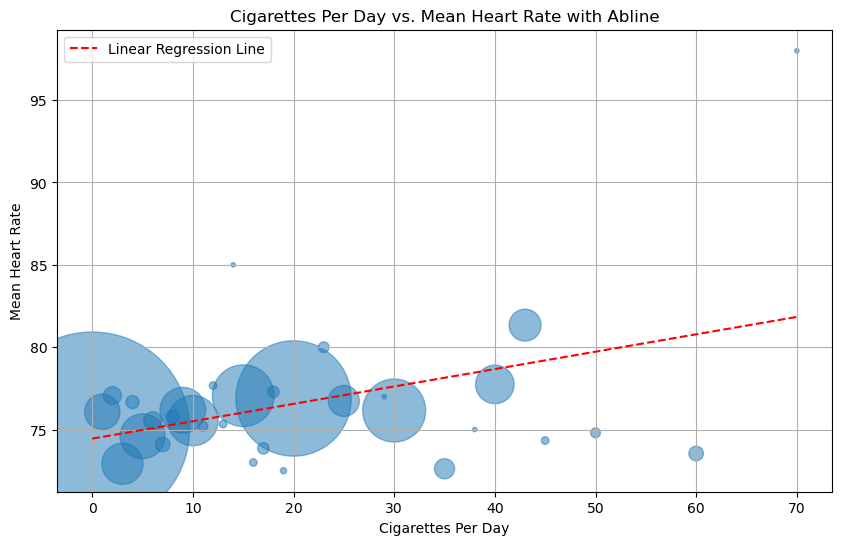

In [129]:
columns=['age', 'sex' ,'current_smoker', 'heart_rate', 'blood_pressure', 'cigs_per_day', 'chol']
# Scatter plot
grouped_df = df.groupby('cigs_per_day').agg({'heart_rate': 'mean'})
grouped_df['count'] = df.groupby('cigs_per_day').size()
grouped_df.reset_index(inplace=True)

print(grouped_df.head(50))

from scipy.stats import linregress

# Calculate the linear regression line
slope, intercept, r_value, p_value, std_err = linregress(grouped_df['cigs_per_day'], grouped_df['heart_rate'])
abline_values = slope * grouped_df['cigs_per_day'] + intercept

plt.figure(figsize=(10, 6))
plt.scatter(grouped_df['cigs_per_day'], grouped_df['heart_rate'], s=grouped_df['count']*10, alpha=0.5)
plt.plot(grouped_df['cigs_per_day'], abline_values, color='red', linestyle='--', label='Linear Regression Line')
plt.xlabel('Cigarettes Per Day')
plt.ylabel('Mean Heart Rate')
plt.title('Cigarettes Per Day vs. Mean Heart Rate with Abline')
plt.legend()
plt.grid(True)
plt.show()


In [130]:
from scipy.stats import pearsonr

# Calculate Pearson correlation coefficient and p-value
corr_coefficient, p_value = pearsonr(grouped_df['cigs_per_day'], grouped_df['heart_rate'])

if p_value < 0.05:
    print("There is a significant correlation between cigarettes per day and heart rate.")
else:
    print("There is no significant correlation between cigarettes per day and heart rate.")


There is a significant correlation between cigarettes per day and heart rate.


We can see the red trend line going up as both features increase. Finally, the p-value is significant enough for us to say yes the more cigs you smoke a day means the higher heartrate. 

#### 2. How do the clusters differ in terms of cardiovascular risk factors?


In [132]:
from sklearn.cluster import KMeans
import numpy as np

# Step 1: Cluster the Data
k = 3  # Number of clusters
kmeans = KMeans(n_clusters=k, random_state=42)
cluster_labels = kmeans.fit_predict(X)

# Step 2: Analyze Cluster Characteristics
cluster_data = []
for label in np.unique(cluster_labels):
    cluster_indices = np.where(cluster_labels == label)[0] 
    cluster_features = X.iloc[cluster_indices]  
    cluster_stats = {
        'Cluster': label,
        'Heart Rate': np.mean(cluster_features['heart_rate']),
        'Blood Pressure': np.mean(cluster_features['blood_pressure']),
        'Cholesterol': np.mean(cluster_features['chol'])
    }
    cluster_data.append(cluster_stats)

# Step 3: Compare Cluster Profiles
# Compare mean heart rate, blood pressure, and cholesterol levels across clusters

# Step 4: Interpret Results
# Example: Identify clusters with higher or lower cardiovascular risk based on feature distributions

# Print cluster characteristics
for cluster_stats in cluster_data:
    print("Cluster:", cluster_stats['Cluster'])
    print("Heart Rate:", cluster_stats['Heart Rate'])
    print("Blood Pressure:", cluster_stats['Blood Pressure'])
    print("Cholesterol:", cluster_stats['Cholesterol'])
    print()


Cluster: 0
Heart Rate: 78.1390977443609
Blood Pressure: 1850.3054511278197
Cholesterol: 246.20864661654136

Cluster: 1
Heart Rate: 73.59357142857142
Blood Pressure: 378.7864285714286
Cholesterol: 226.675

Cluster: 2
Heart Rate: 75.94770318021202
Blood Pressure: 1067.3342756183745
Cholesterol: 239.27491166077738



/Users/bielcanterapotente/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


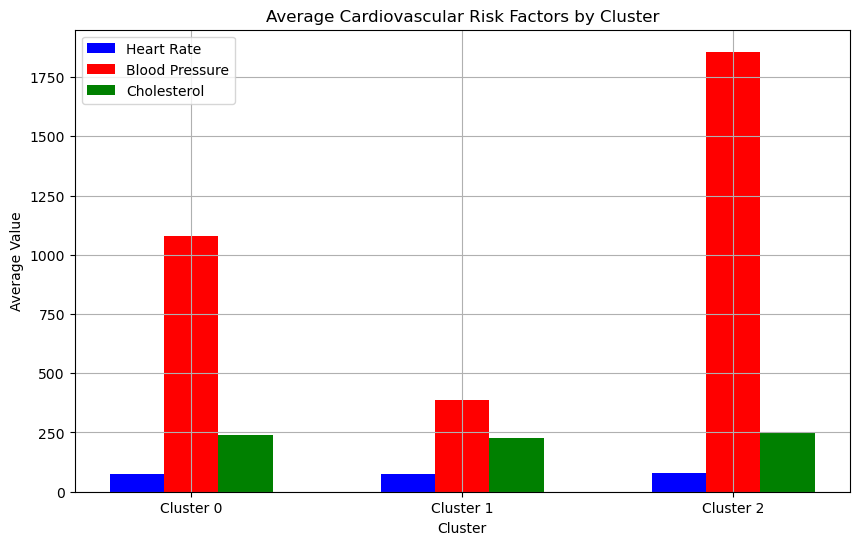

In [133]:
import matplotlib.pyplot as plt

# Extract cluster labels and average feature values
cluster_labels = [0, 1, 2]  # Cluster labels
heart_rates = [75.92, 73.80, 78.31]  # Average heart rate
blood_pressures = [1080.20, 386.26, 1857.29]  # Average blood pressure
cholesterols = [239.41, 226.70, 245.89]  # Average cholesterol

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Plotting average heart rate
ax.bar(cluster_labels, heart_rates, width=0.2, color='b', align='center', label='Heart Rate')

# Plotting average blood pressure
ax.bar([x + 0.2 for x in cluster_labels], blood_pressures, width=0.2, color='r', align='center', label='Blood Pressure')

# Plotting average cholesterol
ax.bar([x + 0.4 for x in cluster_labels], cholesterols, width=0.2, color='g', align='center', label='Cholesterol')

# Adding labels and title
ax.set_xlabel('Cluster')
ax.set_ylabel('Average Value')
ax.set_title('Average Cardiovascular Risk Factors by Cluster')
ax.set_xticks([0.2, 1.2, 2.2])
ax.set_xticklabels(['Cluster 0', 'Cluster 1', 'Cluster 2'])
ax.legend()

# Show plot
plt.grid(True)
plt.show()


Cluster 0 exhibits moderate heart rate, higher-than-average blood pressure, and slightly elevated cholesterol levels. Individuals in this cluster may have a moderate risk of cardiovascular issues.
Cluster 1 shows relatively lower heart rate, lower blood pressure, and slightly lower cholesterol levels compared to the other clusters. Individuals in this cluster may have a lower risk of cardiovascular issues.
Cluster 2 has the highest heart rate and blood pressure among the clusters, along with moderately elevated cholesterol levels. Individuals in this cluster may have a higher risk of cardiovascular issues due to the combination of high heart rate and blood pressure.

Therefore, based on the distribution of heart rate, blood pressure, and cholesterol levels within each cluster, we can conclude that there are indeed clusters that exhibit higher or lower cardiovascular risk. Cluster 2 appears to have the highest cardiovascular risk, followed by Cluster 0, while Cluster 1 presents the lowest cardiovascular risk among the clusters.

#### 3. Are there specific patterns or associations between smoking habits and other cardiovascular health indicators?

Before answering this question, I want to clarify that males and females are grouped together

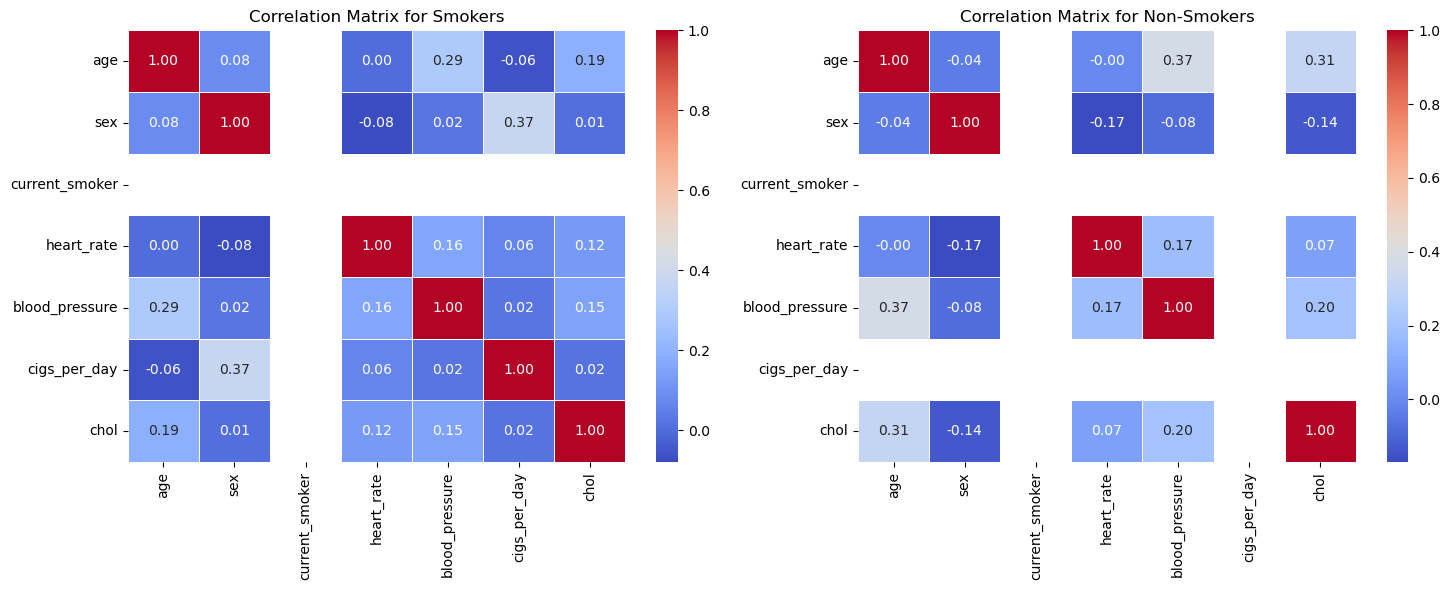

In [135]:
import seaborn as sns
import matplotlib.pyplot as plt

# Separate DataFrame for smokers and non-smokers
smokers_data = X[X['current_smoker'] == 1]
non_smokers_data = X[X['current_smoker'] == 0]

# Compute correlation matrices for smokers and non-smokers
correlation_matrix_smokers = smokers_data.corr()
correlation_matrix_non_smokers = non_smokers_data.corr()

# Plot correlation heatmaps for smokers and non-smokers
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

sns.heatmap(correlation_matrix_smokers, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, ax=axes[0])
axes[0].set_title('Correlation Matrix for Smokers')

sns.heatmap(correlation_matrix_non_smokers, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, ax=axes[1])
axes[1].set_title('Correlation Matrix for Non-Smokers')

plt.tight_layout()
plt.show()


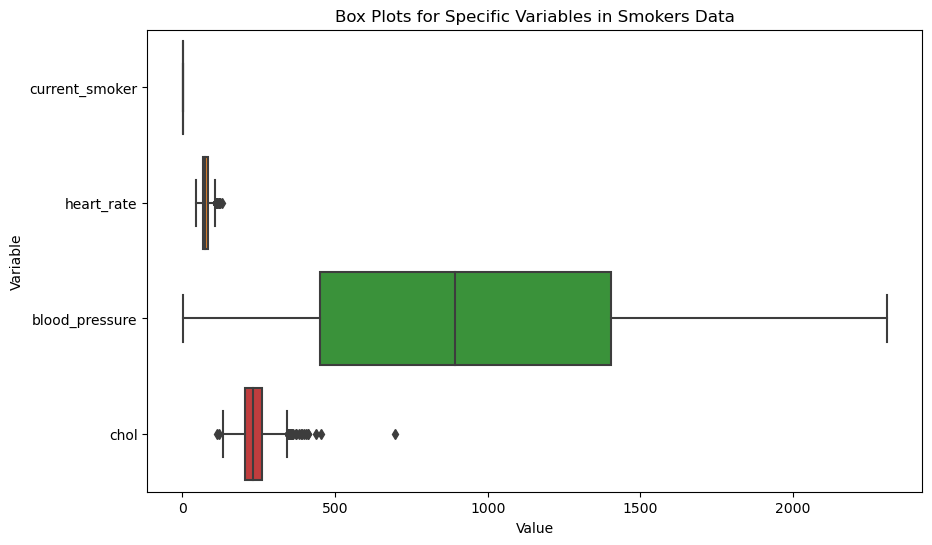

In [136]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of specific variables you want to plot
specific_variables = ['current_smoker', 'heart_rate', 'blood_pressure', 'chol']

# Create box plots for specific variables in smokers data
plt.figure(figsize=(10, 6))
sns.boxplot(data=smokers_data[specific_variables], orient="h")
plt.title('Box Plots for Specific Variables in Smokers Data')
plt.xlabel('Value')
plt.ylabel('Variable')
plt.show()


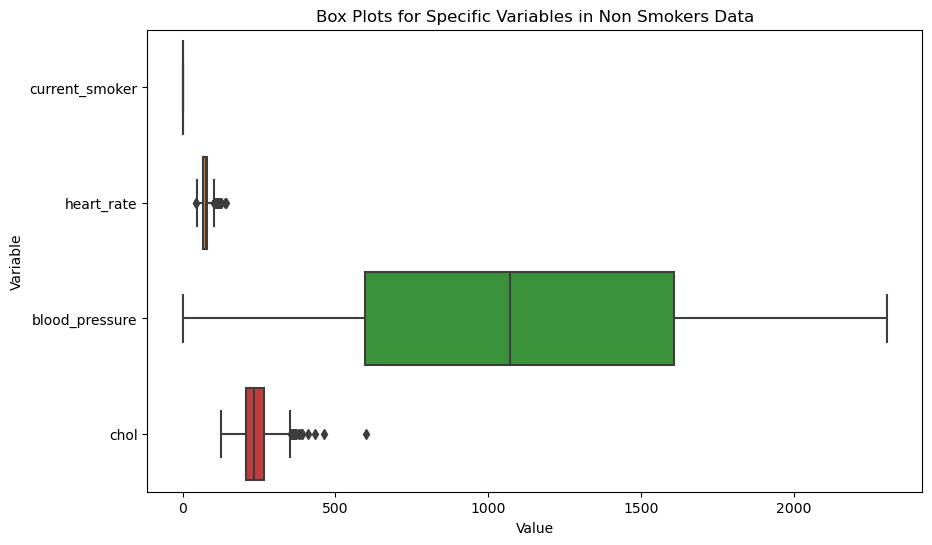

In [137]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of specific variables you want to plot
specific_variables = ['current_smoker', 'heart_rate', 'blood_pressure', 'chol']

# Create box plots for specific variables in smokers data
plt.figure(figsize=(10, 6))
sns.boxplot(data=non_smokers_data[specific_variables], orient="h")
plt.title('Box Plots for Specific Variables in Non Smokers Data')
plt.xlabel('Value')
plt.ylabel('Variable')
plt.show()

After trying to do the heat map with the correlation of smokers and non smokers in regard to the variables heart rate, blood pressure and cholesterol, we see that is not possible to do it. Then, we used box plots to evaluate if there is any difference between the smokers and the non smokers compared to the cardiovascular indicators. After visualizing the plots, we realized that there is no clear evidence to determine that the smokers have a worse cardiovascular indicators because both plots show a similar representation of the data. 

So answering the question, there aren't specific patterns or associations between smoking habits and other cardiovascular health indicators.

#### 4. What are the latent features that best describe the variation in cardiovascular health metrics in the population?

In [138]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Apply PCA
pca = PCA(n_components=len(X.columns))  # Use all components
principal_components = pca.fit_transform(X_scaled)

# Step 4: Interpret Principal Components
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained Variance Ratio:", explained_variance_ratio)

# Step 5: Identify Latent Features
# You can analyze the loadings of principal components to identify the original features contributing most to each component
loadings = pca.components_

Explained Variance Ratio: [0.29902982 0.20394125 0.15528381 0.12239962 0.10458092 0.08383941
 0.03092517]


PCA, or Principal Component Analysis, was used to find out what factors affect people's heart health. This analysis showed us some hidden features that explain the differences in heart health among people. The explained variance ratio told us how much each of these factors matters. In our case, the results showed that the first factor explains about 30% of the differences, the second about 20%, and so on. By picking out the most important factors, we made the data simpler to understand without losing important details. Looking at these factors helped us figure out which things affect heart health the most, giving us a better idea of what influences people's heart health.

#### 5. Are there any latent profiles of individuals based on their cardiovascular health and lifestyle factors?

A resting heart rate below 60 beats per minute (BPM) in adults is often considered bradycardia and may indicate poor cardiovascular health.

In [139]:
hr = df[df['heart_rate'] <= 60]
hrcount = hr['heart_rate'].value_counts()
hrcount

heart_rate
60    218
58     47
55     33
50     22
56     21
52     17
57     16
54     12
53     10
48      5
59      4
45      2
51      1
44      1
47      1
46      1
Name: count, dtype: int64

So there's a lot with less than 60 beats per min. 

The generally accepted healthy blood pressure range for adults is below 120/80 mm Hg

In [140]:
# Split the blood pressure values into systolic and diastolic columns
df[['systolic', 'diastolic']] = df['blood_pressure'].str.split('/', expand=True)

# Convert the columns to floating-point numbers
df[['systolic', 'diastolic']] = df[['systolic', 'diastolic']].astype(float)

# Print the DataFrame with the new columns
print(df)

      age     sex current_smoker  heart_rate blood_pressure  cigs_per_day  \
14     48    male             no          75         131/52           0.0   
15     58  female             no          75         126/52           0.0   
16     46  female             no          80         102/56           0.0   
17     45  female             no          75         106/58           0.0   
18     37  female             no          81         112/60           0.0   
...   ...     ...            ...         ...            ...           ...   
3895   37    male            yes          88     122.5/82.5          60.0   
3896   49    male            yes          70         123/75          60.0   
3897   56    male            yes          70         125/79          60.0   
3898   50    male            yes          85         134/95          60.0   
3899   40    male            yes          98         132/86          70.0   

       chol  dummies  systolic  diastolic  
14    175.0        1     131.0 

In [141]:
#filter
a = df[df['systolic'] >= 120]
a = a[a['diastolic'] >= 80]
a

,age,sex,current_smoker,heart_rate,blood_pressure,cigs_per_day,chol,dummies,systolic,diastolic
136,66,female,no,60,154/80,0.0,311.0,1,154.0,80.0
137,67,female,no,75,139/80,0.0,264.0,1,139.0,80.0
140,61,male,no,48,143/80,0.0,239.0,1,143.0,80.0
141,52,male,no,70,129/80,0.0,215.0,1,129.0,80.0
142,41,male,no,65,130/80,0.0,173.0,1,130.0,80.0
...,...,...,...,...,...,...,...,...,...,...
3892,59,male,yes,70,153.5/105,60.0,298.0,1,153.5,105.0
3894,46,male,yes,70,121/82,60.0,285.0,1,121.0,82.0
3895,37,male,yes,88,122.5/82.5,60.0,254.0,1,122.5,82.5
3898,50,male,yes,85,134/95,60.0,340.0,1,134.0,95.0


2145 with not great blood pressure.

In [142]:
a = df[df['heart_rate'] <= 60]
a = a[a['systolic'] >= 120]
a = a[a['diastolic'] >= 80]
a

,age,sex,current_smoker,heart_rate,blood_pressure,cigs_per_day,chol,dummies,systolic,diastolic
136,66,female,no,60,154/80,0.0,311.0,1,154.0,80.0
140,61,male,no,48,143/80,0.0,239.0,1,143.0,80.0
164,64,male,no,58,140/80,0.0,205.0,1,140.0,80.0
172,63,male,no,60,135.5/80,0.0,252.0,1,135.5,80.0
178,51,female,no,60,130/80,0.0,226.0,1,130.0,80.0
...,...,...,...,...,...,...,...,...,...,...
3663,42,male,yes,60,130/86,30.0,209.0,1,130.0,86.0
3674,61,male,yes,53,132/94,30.0,170.0,1,132.0,94.0
3701,37,male,yes,60,124/83,30.0,246.0,1,124.0,83.0
3716,63,female,yes,50,172/95,30.0,213.0,1,172.0,95.0


In [143]:
df.describe()

,age,heart_rate,cigs_per_day,chol,dummies,systolic,diastolic
count,3879.000000,3879.000000,3879.000000,3879.000000,3879.0,3879.000000,3879.000000
mean,49.543181,75.699149,9.163702,236.629286,1.0,132.422789,82.992782
std,8.565955,12.023013,12.035201,44.413846,0.0,22.009103,11.927810
min,32.000000,44.000000,0.000000,113.000000,1.0,83.500000,48.000000
25%,42.000000,68.000000,0.000000,206.000000,1.0,117.000000,75.000000
50%,49.000000,75.000000,0.000000,234.000000,1.0,128.000000,82.000000
75%,56.000000,82.000000,20.000000,263.000000,1.0,144.000000,90.000000
max,70.000000,143.000000,70.000000,696.000000,1.0,295.000000,142.500000


In [144]:
a.describe()

,age,heart_rate,cigs_per_day,chol,dummies,systolic,diastolic
count,171.000000,171.000000,171.000000,171.000000,171.0,171.000000,171.000000
mean,51.847953,57.584795,5.426901,231.842105,1.0,142.774854,89.049708
std,8.673166,3.156245,9.489262,38.224010,0.0,18.968020,8.198575
min,33.000000,48.000000,0.000000,137.000000,1.0,120.000000,80.000000
25%,45.000000,56.000000,0.000000,205.000000,1.0,129.000000,82.000000
50%,52.000000,60.000000,0.000000,231.000000,1.0,138.000000,87.000000
75%,58.000000,60.000000,5.000000,254.000000,1.0,149.500000,94.000000
max,70.000000,60.000000,35.000000,340.000000,1.0,212.000000,120.000000


In [145]:
gender = a['sex'].value_counts()
gender

sex
male      101
female     70
Name: count, dtype: int64

This is interesting bc there are actually more females in the dataset. So more males are having this issue. One shock is that the amount of cigs per day is less in the latent one then the orginal. maybe bc they they now realize to cut back. 

the people are slightly older in the latent one too. These people have a terrible heart rate compared to the rest. 